<a href="https://colab.research.google.com/github/RasaRaj/ANN/blob/main/Face%20rec%20Dataset_GoogleNet%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg  
  inflating: Final datateset for Image/validation/happy/16106.jpg  
  inflating: Final datateset for Image/validation/happy/16108.jpg  
  inflating: Final datateset for Image/validation/happy/16120.jpg  
  inflating: Final datateset for Image/validation/happy/16141.jpg  
  inflating: Final datateset for Image/validation/happy/16192.jpg  
  inflating: Final datateset for Image/validation/happy/16198.jpg  
  inflating: Final datateset for Image/validation/happy/16238.jpg  
  inflating: Final datateset for Image/validation/happy/16275.jpg  
  inflating: Final datateset for Image/validation/happy/1628.jpg 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
from keras.layers.serialization import activation
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
train_dir = '/content/Final datateset for Image/train'
validation_dir = '/content/Final datateset for Image/validation'

In [ ]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode ='categorical',
                                                    subset='training')
     

Found 17514 images belonging to 13 classes.


In [ ]:

test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [ ]:

# Define the input shape of the model
input_shape = (224, 224, 3)

# Load the pre-trained InceptionV3 model without the top layers
google_net = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Display the output shape of the model
google_net.output


87910968/87910968 [==============================] - 1s 0us/step


<KerasTensor: shape=(None, 5, 5, 2048) dtype=float32 (created by layer 'mixed10')>

In [ ]:
for layer in google_net.layers:
  layer.trainable = False
x=Flatten()(google_net.output)
prediction=Dense(7, activation= 'softmax')(x)
model=Model(inputs=google_net.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

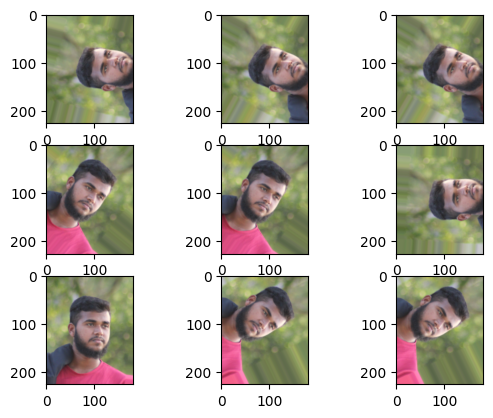

In [ ]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img =  tf.keras.preprocessing.image.load_img('/content/Final datateset for Image/validation/rasa/51.png')
# convert to numpy array
data =  tf.keras.preprocessing.image.img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics =['accuracy']) 

In [ ]:
history = model.fit(train_generator,epochs=30)

Epoch 1/30
23/23 [==============================] - 19s 123ms/step - loss: 1.5122 - accuracy: 0.4267 - val_loss: 0.7521 - val_accuracy: 0.7917
Epoch 2/30
23/23 [==============================] - 1s 37ms/step - loss: 0.6902 - accuracy: 0.7956 - val_loss: 0.5248 - val_accuracy: 0.9167
Epoch 3/30
23/23 [==============================] - 1s 36ms/step - loss: 0.4306 - accuracy: 0.8978 - val_loss: 0.4324 - val_accuracy: 0.9583
Epoch 4/30
23/23 [==============================] - 1s 36ms/step - loss: 0.3194 - accuracy: 0.9289 - val_loss: 0.3847 - val_accuracy: 0.9583
Epoch 5/30
23/23 [==============================] - 1s 35ms/step - loss: 0.2349 - accuracy: 0.9422 - val_loss: 0.3700 - val_accuracy: 0.9583
Epoch 6/30
23/23 [==============================] - 2s 60ms/step - loss: 0.1938 - accuracy: 0.9689 - val_loss: 0.3128 - val_accuracy: 0.9583
Epoch 7/30
23/23 [==============================] - 1s 36ms/step - loss: 0.1533 - accuracy: 0.9822 - val_loss: 0.2873 - val_accuracy: 0.9583
Epoch 8/30


In [ ]:
#Preprocessing
from tensorflow.keras.preprocessing import image
import numpy as np

img_pred=image.load_img("/content/Final datateset for Image/validation/rasa/51.png",target_size=(224,224))
img_pred = np.expand_dims(img_pred, axis=0)
result = model.predict(img_pred)

print(result)

1/1 [==============================] - 0s 29ms/step
[[9.8753642e-22 1.4214348e-20 1.5075377e-28 3.5262359e-30 8.5405329e-33
  1.0000000e+00 7.0043929e-29]]


In [ ]:
if result[0][0]>result[0][1]:
  prediction = "rafat"

else:
  prediction = "rasa"


print(prediction)
     

rasa
